# HCV data Machine Learning Analysing

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import plotly.express as px
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

from functions import *

## Cleaning Data

Import dataset:

In [3]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Check how many NA valuse do we have in the data:

In [4]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

because the number of NAs were not many, so we droped all the rows containing NA value:

In [5]:
data = data.dropna()
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


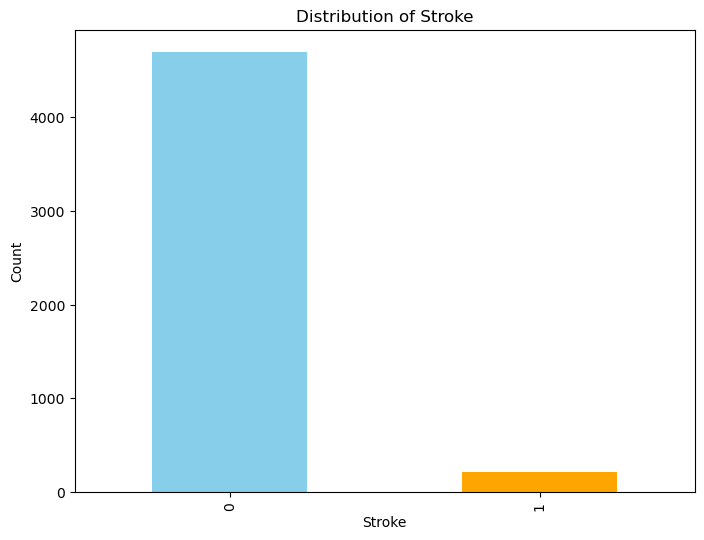

In [7]:
import matplotlib.pyplot as plt

# Count the occurrences of each value in the 'stroke' column
stroke_counts = data['stroke'].value_counts()

# Define a list of colors
colors = ['skyblue', 'orange', 'green', 'red', 'purple']  # Adjust the colors based on the number of categories

# Create a bar plot with different colors
plt.figure(figsize=(8, 6))
stroke_counts.plot(kind='bar', color=colors[:len(stroke_counts)])

# Add title and labels
plt.title('Distribution of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')

# Show plot
plt.show()

In [6]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Check if the data type of all columns are correct:

In [7]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Transform the "AgeGroup" column into differernt bins and make it numerical:

In [8]:
data = clean_age_column(data)

data.head()

d:\Ironhack\Git\ML_Project\functions.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AgeGroup'] = pd.cut(data['age'], bins=[0, 18, 35, 50, 65, 100], labels=[0, 1, 2, 3, 4])
d:\Ironhack\Git\ML_Project\functions.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AgeGroup'] = data['AgeGroup'].astype('int64')
d:\Ironhack\Git\ML_Project\functions.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup
0,9046,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,4
2,31112,Male,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,4
3,60182,Female,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,2
4,1665,Female,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,4
5,56669,Male,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,4


In [9]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

Transform the "gender" column from categorical to numerical:

In [10]:
# Drop rows where 'gender' is 'Other'
data = data[data['gender'] != 'Other']

In [11]:
# data['gender'] = data['gender'].map({'Male': 0,'Female': 1})
# data['gender'].astype(int)
# data.head()
data= pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type'])
data.head()

,id,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,9046,0,1,228.69,36.6,formerly smoked,1,4,False,True,False,True,False,False,True,False,False,False,True
2,31112,0,1,105.92,32.5,never smoked,1,4,False,True,False,True,False,False,True,False,False,True,False
3,60182,0,0,171.23,34.4,smokes,1,2,True,False,False,True,False,False,True,False,False,False,True
4,1665,1,0,174.12,24.0,never smoked,1,4,True,False,False,True,False,False,False,True,False,True,False
5,56669,0,0,186.21,29.0,formerly smoked,1,4,False,True,False,True,False,False,True,False,False,False,True


The "Category" column is our Target column. so we want to make sure how to categorize it in the best form.

In [12]:
data["stroke"].unique()

array([1, 0], dtype=int64)

In [13]:
data.drop(columns="id", inplace=True)
data.head()

,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,0,1,228.69,36.6,formerly smoked,1,4,False,True,False,True,False,False,True,False,False,False,True
2,0,1,105.92,32.5,never smoked,1,4,False,True,False,True,False,False,True,False,False,True,False
3,0,0,171.23,34.4,smokes,1,2,True,False,False,True,False,False,True,False,False,False,True
4,1,0,174.12,24.0,never smoked,1,4,True,False,False,True,False,False,False,True,False,True,False
5,0,0,186.21,29.0,formerly smoked,1,4,False,True,False,True,False,False,True,False,False,False,True


In [14]:
data['smoking_status'] = data['smoking_status'].map({'never smoked': 0,'Unknown': 1,'formerly smoked': 2,'smokes': 3})
data['smoking_status'].astype(int)
data.head()

,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,0,1,228.69,36.6,2,1,4,False,True,False,True,False,False,True,False,False,False,True
2,0,1,105.92,32.5,0,1,4,False,True,False,True,False,False,True,False,False,True,False
3,0,0,171.23,34.4,3,1,2,True,False,False,True,False,False,True,False,False,False,True
4,1,0,174.12,24.0,0,1,4,True,False,False,True,False,False,False,True,False,True,False
5,0,0,186.21,29.0,2,1,4,False,True,False,True,False,False,True,False,False,False,True


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hypertension             4908 non-null   int64  
 1   heart_disease            4908 non-null   int64  
 2   avg_glucose_level        4908 non-null   float64
 3   bmi                      4908 non-null   float64
 4   smoking_status           4908 non-null   int64  
 5   stroke                   4908 non-null   int64  
 6   AgeGroup                 4908 non-null   int64  
 7   gender_Female            4908 non-null   bool   
 8   gender_Male              4908 non-null   bool   
 9   ever_married_No          4908 non-null   bool   
 10  ever_married_Yes         4908 non-null   bool   
 11  work_type_Govt_job       4908 non-null   bool   
 12  work_type_Never_worked   4908 non-null   bool   
 13  work_type_Private        4908 non-null   bool   
 14  work_type_Self-employed  4908

In [16]:
data = data.apply(pd.to_numeric, errors='coerce')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hypertension             4908 non-null   int64  
 1   heart_disease            4908 non-null   int64  
 2   avg_glucose_level        4908 non-null   float64
 3   bmi                      4908 non-null   float64
 4   smoking_status           4908 non-null   int64  
 5   stroke                   4908 non-null   int64  
 6   AgeGroup                 4908 non-null   int64  
 7   gender_Female            4908 non-null   bool   
 8   gender_Male              4908 non-null   bool   
 9   ever_married_No          4908 non-null   bool   
 10  ever_married_Yes         4908 non-null   bool   
 11  work_type_Govt_job       4908 non-null   bool   
 12  work_type_Never_worked   4908 non-null   bool   
 13  work_type_Private        4908 non-null   bool   
 14  work_type_Self-employed  4908

## Feature Selection

In [18]:
# Calculate the correlation matrix
correlation_matrix = np.abs(data.corr())

# Create the heatmap using Plotly Express
fig = px.imshow(correlation_matrix,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu_r',  # Red-Blue diverging color scale
                zmin=-1,
                zmax=1,
                aspect="auto",
                title='Correlation Heatmap of Numerical Variables')

# Update the layout for better readability
fig.update_layout(
    xaxis_title="",
    yaxis_title="",
    xaxis={'side': 'top'},  # Move x-axis labels to the top
    width=800,
    height=700
)

# Add correlation values as text annotations
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        fig.add_annotation(
            x=correlation_matrix.columns[j],
            y=correlation_matrix.columns[i],
            text=f"{value:.2f}",
            showarrow=False,
            font=dict(size=8)
        )

# Show the plot
fig.show()

In [12]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)

# Apply Random Oversampling
X_res, y_res = ros.fit_resample(features, target)

# After Random Oversampling
print("Resampled dataset shape:", Counter(y_res))

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)




Resampled dataset shape: Counter({1: 4700, 0: 4700})


## Split Data into Train and Test

In [10]:
features = data.drop(columns = ["stroke"])
target = data["stroke"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

### Standardize The Data

In [21]:
# Standardize the features
X_train_scaled, X_test_scaled = Standardizer(X_train, X_test)

### Normalize The Data

In [22]:
# Normalize the features
X_train_norm, X_test_norm = Normalizer(X_train, X_test)

Based on the result of Heatmap we can drop these two not important columns : 

In [23]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
# X_train_reduced = X_train_norm.drop(columns = ["gender","Residence_type"])

X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
# X_test_reduced = X_test_norm.drop(columns = ["gender","Residence_type"])

In [24]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.95      0.93       982

Accuracy: 0.9541751527494908


In [26]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize and fit GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
print(grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predict and evaluate with the best model
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982

Accuracy: 0.9562118126272913


c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
bagging_rf = BaggingClassifier(base_estimator=rf, n_estimators=10, random_state=42)
bagging_rf.fit(X_train, y_train)
y_pred_bagging_rf = bagging_rf.predict(X_test)
print("Bagging with Random Forest\n", classification_report(y_test, y_pred_bagging_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_bagging_rf))

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Bagging with Random Forest
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982

Accuracy: 0.955193482688391


### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression


# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982

Accuracy: 0.9562118126272913


c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
bagging_lr = BaggingClassifier(base_estimator=lr, n_estimators=10, random_state=42)
bagging_lr.fit(X_train, y_train)
y_pred_bagging_lr = bagging_lr.predict(X_test)
print("Bagging with Logistic Regression\n", classification_report(y_test, y_pred_bagging_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_bagging_lr))

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Bagging with Logistic Regression
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982

Accuracy: 0.9562118126272913


c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### GridSearchCV for Each Model

#### GridSearchCV for Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

y_pred_best_rf = best_rf.predict(X_test)
print("Best Random Forest\n", classification_report(y_test, y_pred_best_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))


Fitting 5 folds for each of 108 candidates, totalling 540 fits


#### GridSearchCV for KNN in Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid_knn_bagging = {
    'base_estimator__n_neighbors': [3, 5, 7],
    'n_estimators': [10, 20, 30]
}
grid_search_knn_bagging = GridSearchCV(BaggingClassifier(base_estimator=knn, random_state=42), param_grid_knn_bagging, cv=5, n_jobs=-1, verbose=2)
grid_search_knn_bagging.fit(X_train, y_train)
best_knn_bagging = grid_search_knn_bagging.best_estimator_

y_pred_best_knn_bagging = best_knn_bagging.predict(X_test)
print("Best Bagging with KNN\n", classification_report(y_test, y_pred_best_knn_bagging))
print("Accuracy:", accuracy_score(y_test, y_pred_best_knn_bagging))


#### GridSearchCV for Logistic Regression in Bagging

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
param_grid_lr_bagging = {
    'base_estimator__C': [0.1, 1, 10, 100],
    'n_estimators': [10, 20, 30]
}
grid_search_lr_bagging = GridSearchCV(BaggingClassifier(base_estimator=lr, random_state=42), param_grid_lr_bagging, cv=5, n_jobs=-1, verbose=2)
grid_search_lr_bagging.fit(X_train, y_train)
best_lr_bagging = grid_search_lr_bagging.best_estimator_

y_pred_best_lr_bagging = best_lr_bagging.predict(X_test)
print("Best Bagging with Logistic Regression\n", classification_report(y_test, y_pred_best_lr_bagging))
print("Accuracy:", accuracy_score(y_test, y_pred_best_lr_bagging))


#### GridSearchCV for SVM in Bagging

In [ ]:
from sklearn.svm import SVC

svc = SVC(probability=True, random_state=42)
param_grid_svc_bagging = {
    'base_estimator__C': [0.1, 1, 10, 100],
    'base_estimator__kernel': ['linear', 'rbf'],
    'n_estimators': [10, 20, 30]
}
grid_search_svc_bagging = GridSearchCV(BaggingClassifier(base_estimator=svc, random_state=42), param_grid_svc_bagging, cv=5, n_jobs=-1, verbose=2)
grid_search_svc_bagging.fit(X_train, y_train)
best_svc_bagging = grid_search_svc_bagging.best_estimator_

y_pred_best_svc_bagging = best_svc_bagging.predict(X_test)
print("Best Bagging with SVM\n", classification_report(y_test, y_pred_best_svc_bagging))
print("Accuracy:", accuracy_score(y_test, y_pred_best_svc_bagging))


#### GridSearchCV for Decision Tree in Bagging

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
param_grid_dt_bagging = {
    'base_estimator__max_depth': [None, 10, 20, 30],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4],
    'n_estimators': [10, 20, 30]
}
grid_search_dt_bagging = GridSearchCV(BaggingClassifier(base_estimator=dt, random_state=42), param_grid_dt_bagging, cv=5, n_jobs=-1, verbose=2)
grid_search_dt_bagging.fit(X_train, y_train)
best_dt_bagging = grid_search_dt_bagging.best_estimator_

y_pred_best_dt_bagging = best_dt_bagging.predict(X_test)
print("Best Bagging with Decision Tree\n", classification_report(y_test, y_pred_best_dt_bagging))
print("Accuracy:", accuracy_score(y_test, y_pred_best_dt_bagging))


#### GridSearchCV for AdaBoost with Decision Stump

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

stump = DecisionTreeClassifier(max_depth=1, random_state=42)
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}
grid_search_ada = GridSearchCV(AdaBoostClassifier(base_estimator=stump, random_state=42), param_grid_ada, cv=5, n_jobs=-1, verbose=2)
grid_search_ada.fit(X_train, y_train)
best_ada = grid_search_ada.best_estimator_

y_pred_best_ada = best_ada.predict(X_test)
print("Best AdaBoost\n", classification_report(y_test, y_pred_best_ada))
print("Accuracy:", accuracy_score(y_test, y_pred_best_ada))


#### GridSearchCV for Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [2, 3, 4]
}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_

y_pred_best_gb = best_gb.predict(X_test)
print("Best Gradient Boosting\n", classification_report(y_test, y_pred_best_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_best_gb))


#### Voting Classifier with Best Models

In [ ]:
from sklearn.ensemble import VotingClassifier

# Define best models
best_models = [
    ('rf', best_rf),
    ('knn_bagging', best_knn_bagging),
    ('lr_bagging', best_lr_bagging),
    ('svc_bagging', best_svc_bagging),
    ('dt_bagging', best_dt_bagging),
    ('ada', best_ada),
    ('gb', best_gb)
]

voting_best = VotingClassifier(estimators=best_models, voting='soft')
voting_best.fit(X_train, y_train)
y_pred_voting_best = voting_best.predict(X_test)
print("Voting with Best Models\n", classification_report(y_test, y_pred_voting_best))
print("Accuracy:", accuracy_score(y_test, y_pred_voting_best))


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

results = []

def evaluate_model(model, model_name, ensemble_method, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        'Model': model_name,
        'Ensemble Method': ensemble_method,
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Random Forest
evaluate_model(RandomForestClassifier(random_state=42), 'Random Forest', 'Bagging', {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
})

# KNN in Bagging
evaluate_model(BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=42), 'KNN', 'Bagging', {
    'base_estimator__n_neighbors': [3, 5, 7],
    'n_estimators': [10, 20, 30]
})

# Logistic Regression in Bagging
evaluate_model(BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000, random_state=42), random_state=42), 'Logistic Regression', 'Bagging', {
    'base_estimator__C': [0.1, 1, 10, 100],
    'n_estimators': [10, 20, 30]
})

# SVM in Bagging
evaluate_model(BaggingClassifier(base_estimator=SVC(probability=True, random_state=42), random_state=42), 'SVM', 'Bagging', {
    'base_estimator__C': [0.1, 1, 10, 100],
    'base_estimator__kernel': ['linear', 'rbf'],
    'n_estimators': [10, 20, 30]
})

# Decision Tree in Bagging
evaluate_model(BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42), 'Decision Tree', 'Bagging', {
    'base_estimator__max_depth': [None, 10, 20, 30],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4],
    'n_estimators': [10, 20, 30]
})

# AdaBoost with Logistic Regression
evaluate_model(AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000, random_state=42), random_state=42), 'Logistic Regression', 'AdaBoost', {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
})

# AdaBoost with SVM
evaluate_model(AdaBoostClassifier(base_estimator=SVC(probability=True, random_state=42), random_state=42), 'SVM', 'AdaBoost', {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
})

# AdaBoost with KNN
evaluate_model(AdaBoostClassifier(base_estimator=KNeighborsClassifier(), random_state=42), 'KNN', 'AdaBoost', {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
})

# AdaBoost with Decision Stump
evaluate_model(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, random_state=42), random_state=42), 'Decision Tree (Stump)', 'AdaBoost', {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
})

# Gradient Boosting with Decision Tree
evaluate_model(GradientBoostingClassifier(random_state=42), 'Decision Tree (Full)', 'Gradient Boosting', {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [2, 3, 4]
})

# Voting Classifier with Best Models
voting_best = VotingClassifier(estimators=[
    ('rf', grid_search_rf.best_estimator_),
    ('knn_bagging', grid_search_knn_bagging.best_estimator


In [ ]:
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv('model_results.csv', index=False)

# Display the DataFrame
print(results_df)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
bagging_dt = BaggingClassifier(base_estimator=dt, n_estimators=10, random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_bagging_dt = bagging_dt.predict(X_test)
print("Bagging with Decision Tree\n", classification_report(y_test, y_pred_bagging_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_bagging_dt))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
bagging_knn = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=42)
bagging_knn.fit(X_train, y_train)
y_pred_bagging_knn = bagging_knn.predict(X_test)
print("Bagging with KNN\n", classification_report(y_test, y_pred_bagging_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_bagging_knn))

In [ ]:
from sklearn.svm import SVC

svc = SVC(probability=True, random_state=42)
bagging_svc = BaggingClassifier(base_estimator=svc, n_estimators=10, random_state=42)
bagging_svc.fit(X_train, y_train)
y_pred_bagging_svc = bagging_svc.predict(X_test)
print("Bagging with SVM\n", classification_report(y_test, y_pred_bagging_svc))
print("Accuracy:", accuracy_score(y_test, y_pred_bagging_svc))

### Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

stump = DecisionTreeClassifier(max_depth=1)
ada_model = AdaBoostClassifier(base_estimator=stump, n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
print("AdaBoost with Decision Stump\n", classification_report(y_test, y_pred_ada))
print("Accuracy:", accuracy_score(y_test, y_pred_ada))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=2, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting with Small Decision Trees\n", classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))


### Voting

### Compare Performance

In [ ]:
import pandas as pd
from scipy import stats

def detect_outliers(data):
    """
    Detect outliers in a DataFrame using IQR and Z-score methods.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame.

    Returns:
    dict: A dictionary containing the count of outliers for each column using both methods.
    pd.DataFrame: A DataFrame indicating whether each value is an outlier.
    """
    # Ensure that we are only working with numeric columns
    data = data.select_dtypes(include=[float, int])
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine outliers using IQR method
    iqr_outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
    
    # Calculate Z-scores
    z_scores = stats.zscore(data)
    
    # Determine outliers using Z-score method
    zscore_outliers = pd.DataFrame((abs(z_scores) > 3), columns=data.columns)
    
    # Count the number of outliers in each column for both methods
    outlier_counts = {
        'IQR': iqr_outliers.sum(),
        'Z-score': zscore_outliers.sum()
    }
    
    # Combine both methods to identify outliers
    combined_outliers = iqr_outliers | zscore_outliers
    
    return outlier_counts, combined_outliers

# Example usage:
# data = pd.DataFrame({'A': [1, 2, 3, 4, 5, 100],
#                      'B': [1, 2, 3, 4, 5, -100]})
# outlier_counts, combined_outliers = detect_outliers(data)
# print(outlier_counts)
# print(combined_out


In [ ]:
outlier_counts, combined_outliers = detect_outliers(data)

In [ ]:
print(outlier_counts, combined_outliers)

{'IQR': hypertension         451
heart_disease        243
avg_glucose_level    569
bmi                  110
smoking_status         0
stroke               209
AgeGroup               0
dtype: int64, 'Z-score': hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  4
smoking_status       0
stroke               0
AgeGroup             0
dtype: int64}       hypertension  heart_disease  avg_glucose_level    bmi  smoking_status  \
0            False           True               True  False           False   
2            False           True              False  False           False   
3            False          False               True  False           False   
4             True          False               True  False           False   
5            False          False               True  False           False   
...            ...            ...                ...    ...             ...   
5104         False          False              False  False     

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

def visualize_outliers_per_column(data, column, iqr_multiplier=100, z_score_threshold=50):
    """
    Visualize outliers in an individual column of a DataFrame using IQR and Z-score methods.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame.
    column (str): The column name to visualize outliers for.
    iqr_multiplier (float): The multiplier for the IQR method to adjust the range.
    z_score_threshold (float): The threshold for the Z-score method.
    """
    if column not in data.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame")
    
    # Ensure the column is numeric
    if not pd.api.types.is_numeric_dtype(data[column]):
        raise ValueError(f"Column '{column}' is not numeric")
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine outliers using IQR method with adjusted multiplier
    iqr_outliers = (data[column] < (Q1 - iqr_multiplier * IQR)) | (data[column] > (Q3 + iqr_multiplier * IQR))
    
    # Calculate Z-scores
    z_scores = stats.zscore(data[column])
    
    # Determine outliers using Z-score method with adjusted threshold
    zscore_outliers = abs(z_scores) > z_score_threshold
    
    # Combine both methods to identify outliers
    combined_outliers = iqr_outliers | zscore_outliers
    
    # Visualize using boxplot
    plt.1figure(figsize=(12, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()
    
    # Visualize using histogram
    plt.figure(figsize=(12, 6))
    sns.histplot(data[column], bins=30, kde=True)
    plt.scatter(data[column][combined_outliers], [0] * sum(combined_outliers), color='red', zorder=2, label='Outliers')
    plt.title(f'Histogram for {column}')
    plt.legend()
    plt.show()

# Example usage:
# data = pd.DataFrame({'A': [1, 2, 3, 4, 5, 100],
#                      'B': [1, 2, 3, 4, 5, -100]})
# visualize_outliers_per_column(data, 'A', iqr_multiplier=2, z_score_threshold=3.5)


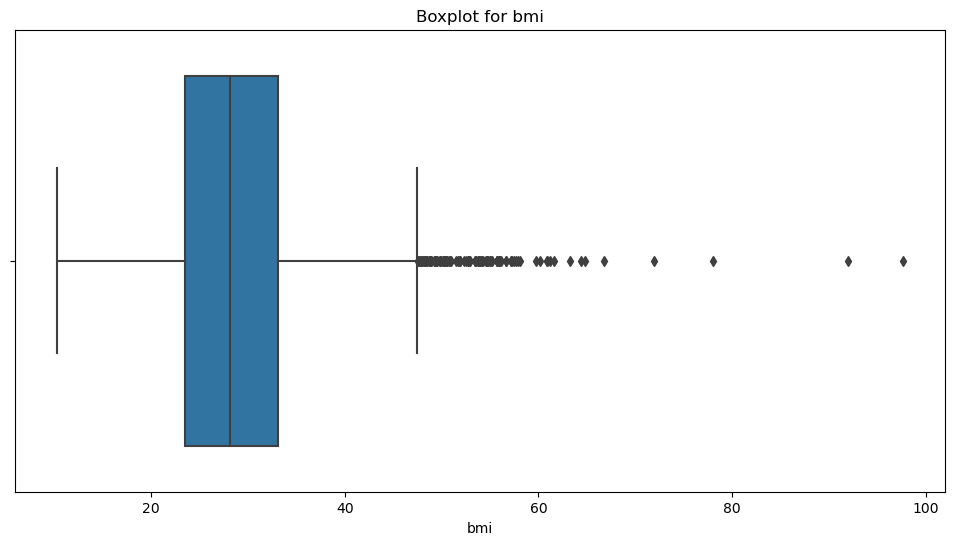

c:\Users\reetu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



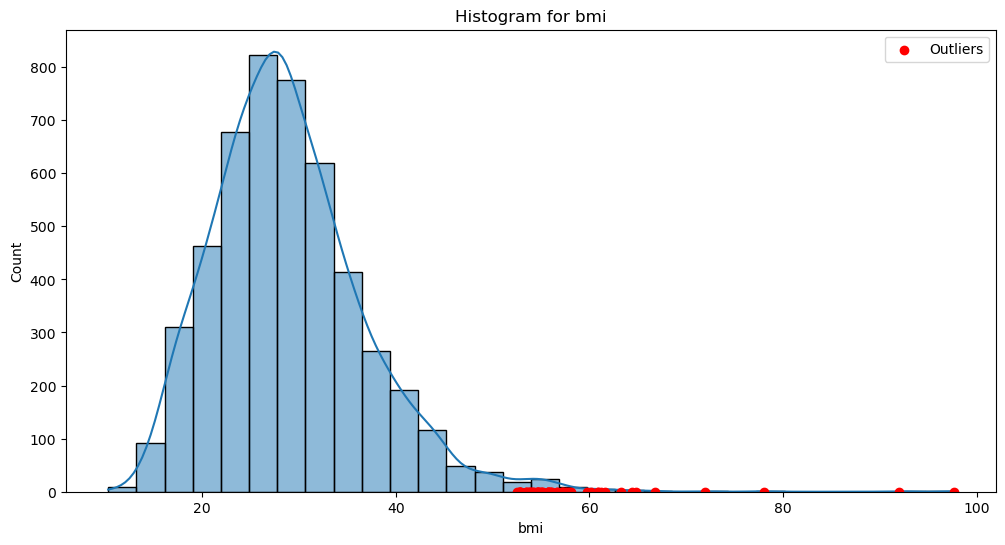

In [ ]:
visualize_outliers_per_column(data, 'bmi', iqr_multiplier=2, z_score_threshold=50)

In [ ]:

ensemble_models = {
    'Bagging with Random Forest': (BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42), random_state=42), {
        'n_estimators': [10, 20],
        'base_estimator__n_estimators': [50, 100],
        'base_estimator__max_depth': [None, 10, 20]
    }),
    'Bagging with KNN': (BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=42), {
        'n_estimators': [10, 20],
        'base_estimator__n_neighbors': [3, 5, 7]
    }),
    'Bagging with Logistic Regression': (BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000, random_state=42), random_state=42), {
        'n_estimators': [10, 20],
        'base_estimator__C': [0.1, 1, 10]
    }),
    'Bagging with SVM': (BaggingClassifier(base_estimator=SVC(probability=True, random_state=42), random_state=42), {
        'n_estimators': [10, 20],
        'base_estimator__C': [0.1, 1, 10],
        'base_estimator__kernel': ['linear', 'rbf']
    }),
    'Bagging with Decision Tree': (BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42), {
        'n_estimators': [10, 20],
        'base_estimator__max_depth': [None, 10, 20]
    }),
    'AdaBoost with Decision Tree Stump': (AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, random_state=42), random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1]
    }),
    'AdaBoost with Logistic Regression': (AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000, random_state=42), random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1]
    }),
    'AdaBoost with KNN': (AdaBoostClassifier(base_estimator=KNeighborsClassifier(), random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1]
    }),
    'Gradient Boosting with Decision Tree': (GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=42), random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    })
}


In [ ]:
def preprocess_and_evaluate(model, model_name, param_grid, X_train, y_train, X_test, y_test, scaler):
    # Apply scaling if needed
    if scaler:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled, X_test_scaled = X_train, X_test

    # Set up GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Predict and evaluate
    y_pred = best_model.predict(X_test_scaled)
    result = {
        'Model': model_name,
        'Scaler': scaler.__class__.__name__ if scaler else 'None',
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }
    
    return result


In [ ]:
ensemble_models = {
    'Bagging with Random Forest': (BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42), random_state=42), {
        'n_estimators': [10, 20],
        'base_estimator__n_estimators': [50, 100],
        'base_estimator__max_depth': [None, 10, 20],
        'max_samples': [0.8, 1.0],
        'max_features': [0.8, 1.0]
    }),
    'Bagging with KNN': (BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=42), {
        'n_estimators': [10, 20],
        'base_estimator__n_neighbors': [3, 5, 7],
        'max_samples': [0.8, 1.0],
        'max_features': [0.8, 1.0]
    }),
    'Bagging with Logistic Regression': (BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000, random_state=42), random_state=42), {
        'n_estimators': [10, 20],
        'base_estimator__C': [0.1, 1, 10],
        'max_samples': [0.8, 1.0],
        'max_features': [0.8, 1.0]
    }),
    'Bagging with SVM': (BaggingClassifier(base_estimator=SVC(probability=True, random_state=42), random_state=42), {
        'n_estimators': [10, 20],
        'base_estimator__C': [0.1, 1, 10],
        'base_estimator__kernel': ['linear', 'rbf'],
        'max_samples': [0.8, 1.0],
        'max_features': [0.8, 1.0]
    }),
    'Bagging with Decision Tree': (BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42), {
        'n_estimators': [10, 20],
        'base_estimator__max_depth': [None, 10, 20],
        'max_samples': [0.8, 1.0],
        'max_features': [0.8, 1.0]
    }),
    'AdaBoost with Decision Tree Stump': (AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, random_state=42), random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1]
    }),
    'AdaBoost with Logistic Regression': (AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000, random_state=42), random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1]
    }),
    'AdaBoost with KNN': (AdaBoostClassifier(base_estimator=KNeighborsClassifier(), random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1]
    }),
    'Gradient Boosting with Decision Tree': (GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=42), random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    }),
    'Gradient Boosting with Logistic Regression': (GradientBoostingClassifier(init=LogisticRegression(max_iter=1000, random_state=42), random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    })
}


In [ ]:
}),
    'AdaBoost with Logistic Regression': (AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000, random_state=42), random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1]
    }),
    'AdaBoost with KNN': (AdaBoostClassifier(base_estimator=KNeighborsClassifier(), random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1]